# Bank Marketing - Logistic Regression

With the data provided using machine learning to help the client to predict their customers subscription. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.



# Import Libraries

We are importing the libraries that are usefull for the process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [2]:
data_df = pd.read_csv('C:/Users/PC125/Desktop/datascience/Day ML7/Assignment Logistic Regression/bank-additional-full.csv')

In [3]:
import os

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.~lock.Problem Statement.odt#',
 'bank-additional-full.csv',
 'BankMarketing_Dataset_LogisticRegression.ipynb',
 'data',
 'Data Dictionary.odt',
 'images',
 'Problem Statement.odt',
 'Report',
 '~$ta Dictionary.odt']

In [5]:
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [6]:
data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

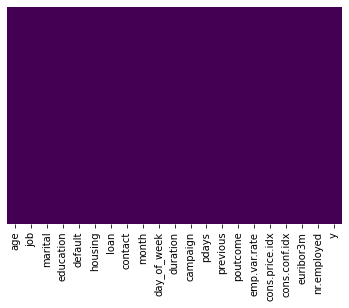

In [9]:
sns.heatmap(data_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no null values among the provided datas. Which reduces the complexity to handle the missing values. Hence proceding with EDA

# Question

What is the percentage ratio og term deposite subscription?

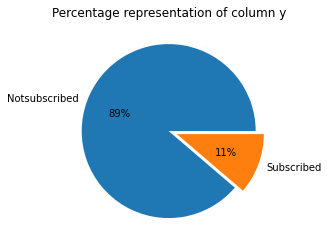

In [10]:
labels = ["Notsubscribed", "Subscribed"]
explode = (0, 0.1) 
plt.pie(data_df['y'].value_counts(), labels = labels, explode=explode, autopct='%.0f%%')
plt.title('Percentage representation of column y')
#plt.savefig('images/image.jpg', bbox_inches='tight', pad_inches=0)
plt.show()


In [11]:
#grouped = data_df.groupby(['y'])['y'].count()/len(data_df)*100
grouped = data_df['y'].value_counts()/len(data_df)*100
print(grouped)

no     88.734583
yes    11.265417
Name: y, dtype: float64


# Result

We can see from the pir-chart that the term deposite subcription is less compared to not subscription. The percentage indicates the difference in subscription, Which helps us to known the senario and focus on the improvement.

# Question

Which range of age group clients will show an interest to subscribe a term deposite?

In [12]:
#grouped = data_df.groupby(['age'])['age','pdays'].sum().sort_values(by='pdays',ascending=False)
grouped = data_df.groupby(['age'])['age'].sum().sort_values(ascending=False)
print(grouped)

age
36    64080
35    61565
33    60489
31    60357
34    59330
      ...  
89      178
95       95
94       94
87       87
17       85
Name: age, Length: 78, dtype: int64


In [13]:
data_df.sort_values(by='age',ascending=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,1,2,2,success,-3.4,92.431,-26.9,0.730,5017.5,yes
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,...,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
39655,92,retired,married,unknown,no,yes,no,cellular,may,thu,...,1,6,2,success,-1.8,93.876,-40.0,0.683,5008.7,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no


Text(0.5, 1.0, 'Client Age group representing plot')

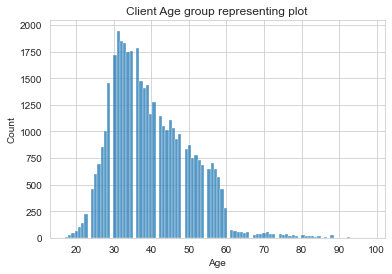

In [14]:
sns.set_style('whitegrid')
sns.histplot(data_df['age'])
#data_df['age'].hist(bins=30)
plt.xlabel('Age')
plt.title("Client Age group representing plot")
#plt.savefig('images/image1.jpg', bbox_inches='tight', pad_inches=0)

# Result

Age group between 28 to 45 are the most number of cline show interest in the term deposite even for subcribing or not interested in term deposite subscription. This range of age group show good interest in term deposite since the have to plan as a retirement scheme. 

**What profession client are subscribing more on a term deposite?**

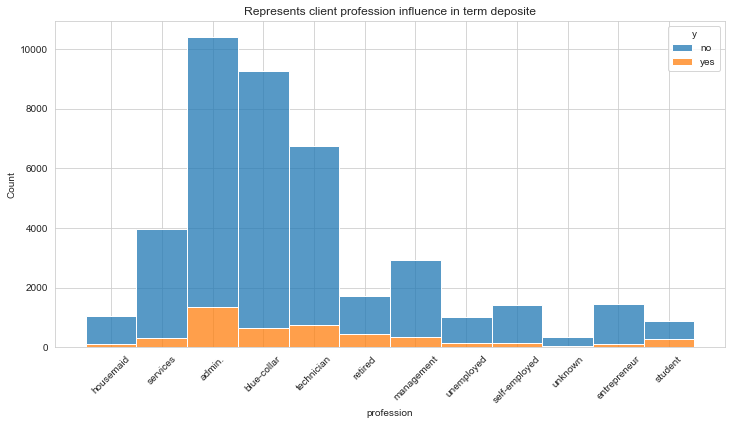

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=data_df, x="job", hue="y",multiple="stack")
plt.xticks(rotation=45)
plt.xlabel("profession")
plt.title("Represents client profession influence in term deposite")

#plt.legend()
plt.savefig('images/image2.jpg', bbox_inches='tight', pad_inches=0)
plt.show()

In [16]:
grouped = data_df.groupby(['job'])['y'].count().sort_values(ascending=False)
#grouped.sort()
print(grouped)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: y, dtype: int64


# Result
From the analysis the Admins, blue-collar and technician job clients are the once highly reached by the term deposite subscription.

**How is marrital status and education affects the subscription?**

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


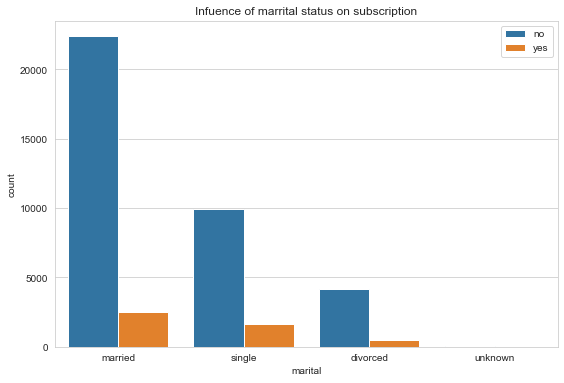

In [17]:
plt.figure(figsize=(9,6))
sns.countplot('marital',data=data_df,hue="y")
#plt.ylabel
plt.title("Infuence of marrital status on subscription")
#plt.savefig('images/image3.jpg', bbox_inches='tight', pad_inches=0)
plt.legend()

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


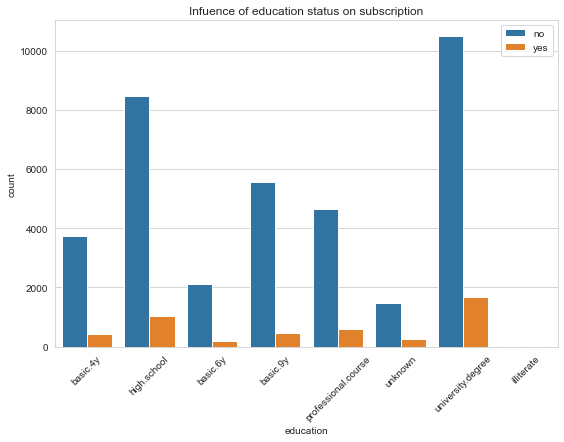

In [18]:
plt.figure(figsize=(9,6))
sns.countplot('education',data=data_df,hue="y")
plt.xticks(rotation=45)
#plt.ylabel
plt.title("Infuence of education status on subscription")
#plt.savefig('images/image4.jpg', bbox_inches='tight', pad_inches=0)
plt.legend()

In [19]:
grouped = data_df.groupby(['marital','education'])['y'].count().reset_index()
grouped[grouped['marital']=='divorced']
#result = list(filter(lambda x: (x['marital'] == "divorced"),grouped))
#@print(grouped['marital'])

#grouped = data_df[['marital','education','y']]
#grouped.query("y=='no'")

#grouped = data_df[data_df['y']=='no']
#grouped

#grouped = data_df['y']=='no' 
#data_df.where(grouped,inplace=True)
#data_df

,marital,education,y
0,divorced,basic.4y,489
1,divorced,basic.6y,182
2,divorced,basic.9y,565
3,divorced,high.school,1193
4,divorced,illiterate,2
5,divorced,professional.course,657
6,divorced,university.degree,1337
7,divorced,unknown,187


In [20]:
grouped = data_df.groupby(['marital'])
grouped.get_group('divorced')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
34,54,blue-collar,divorced,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
71,44,management,divorced,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
85,31,admin.,divorced,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41165,38,housemaid,divorced,university.degree,no,no,no,cellular,nov,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41176,38,housemaid,divorced,high.school,no,yes,yes,cellular,nov,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


# Result

The high school and university students with marital status as single has showed more interest term deposit.

**How is housing loan and loan affects the subscription?**

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Term deposite with respect to loan')

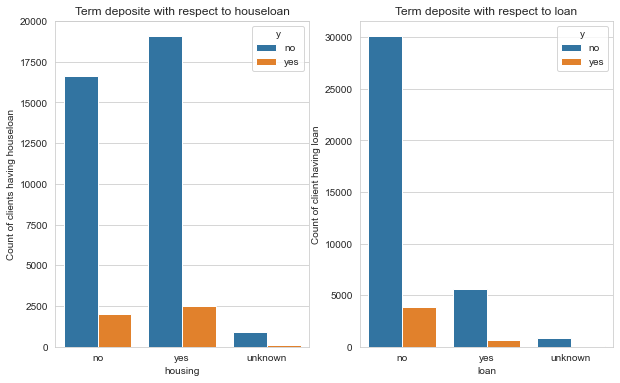

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot('housing',hue='y',data=data_df)
plt.ylabel("Count of clients having houseloan")
plt.title("Term deposite with respect to houseloan")

plt.subplot(1,2,2)
sns.countplot('loan',hue='y',data=data_df)
plt.ylabel("Count of client having loan")
plt.title("Term deposite with respect to loan")
#plt.savefig('images/image5.jpg', bbox_inches='tight', pad_inches=0)


# Result

The clients subscribing for term deposite are high who is having a housing loan where as the client who is not having a loan are high in subcription than the client having loan.

**Which contact has the high rate of term deposite subscription?**

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Term deposite with respect to mode of contact')

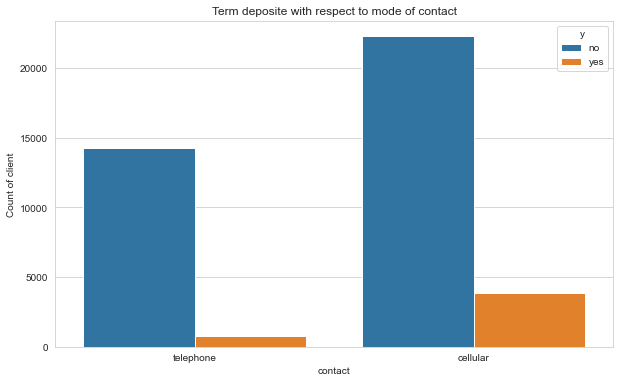

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('contact',hue='y',data=data_df)
plt.ylabel("Count of client")
plt.title("Term deposite with respect to mode of contact")
#plt.savefig('images/image6.jpg', bbox_inches='tight', pad_inches=0)

# Result

* There is a high reach among the clients through the mode of cellular contact.
* We are able to reach a large number of clients through this mode and the acceptance of the client for term deposite is also high.

**Which month or day of week has highest rate of term deposite subscription?**

C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PC125\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Term deposite with respect to day of week')

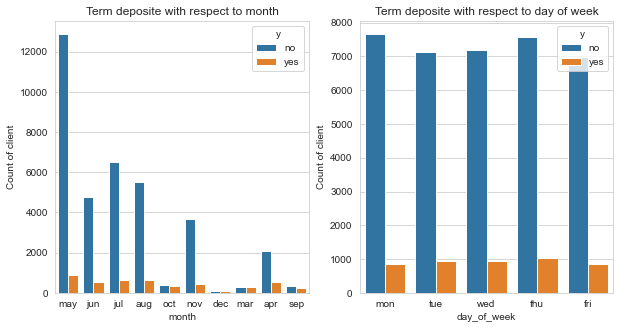

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot('month',hue='y',data=data_df)
plt.ylabel("Count of client")
plt.title("Term deposite with respect to month")

plt.subplot(1,2,2)
sns.countplot('day_of_week',hue='y',data=data_df)
plt.ylabel("Count of client")
plt.title("Term deposite with respect to day of week")
#plt.savefig('images/image7.jpg', bbox_inches='tight', pad_inches=0)

In [24]:
grouped = data_df.groupby(['month','day_of_week'])['y'].count().sort_values(ascending=False)
#grouped.sort()
print(grouped)

month  day_of_week
may    wed            2923
       fri            2858
       tue            2809
       mon            2642
       thu            2537
jul    thu            1672
       tue            1517
       mon            1516
       wed            1457
aug    thu            1347
       tue            1296
jun    mon            1251
aug    wed            1243
       mon            1222
jun    fri            1147
aug    fri            1070
jul    fri            1012
jun    wed             983
       tue             970
       thu             967
nov    thu             903
       wed             863
       tue             814
apr    thu             768
nov    mon             766
       fri             755
apr    mon             702
       fri             610
       wed             300
       tue             252
oct    thu             163
       tue             149
mar    mon             143
oct    fri             142
mar    tue             140
oct    wed             135
       mo

# Result

The month of may is having the highest number of term deposite subscription at the week days.

In [25]:
data_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Creating joint plot of duration and Campaign**

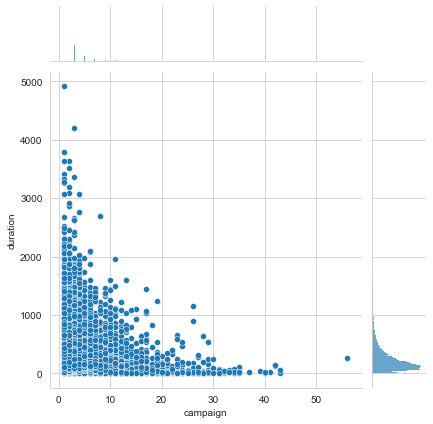

In [26]:
sns.jointplot(y='duration',x='campaign',data=data_df)

**Creating a pairplot with hue defined as 'y'**

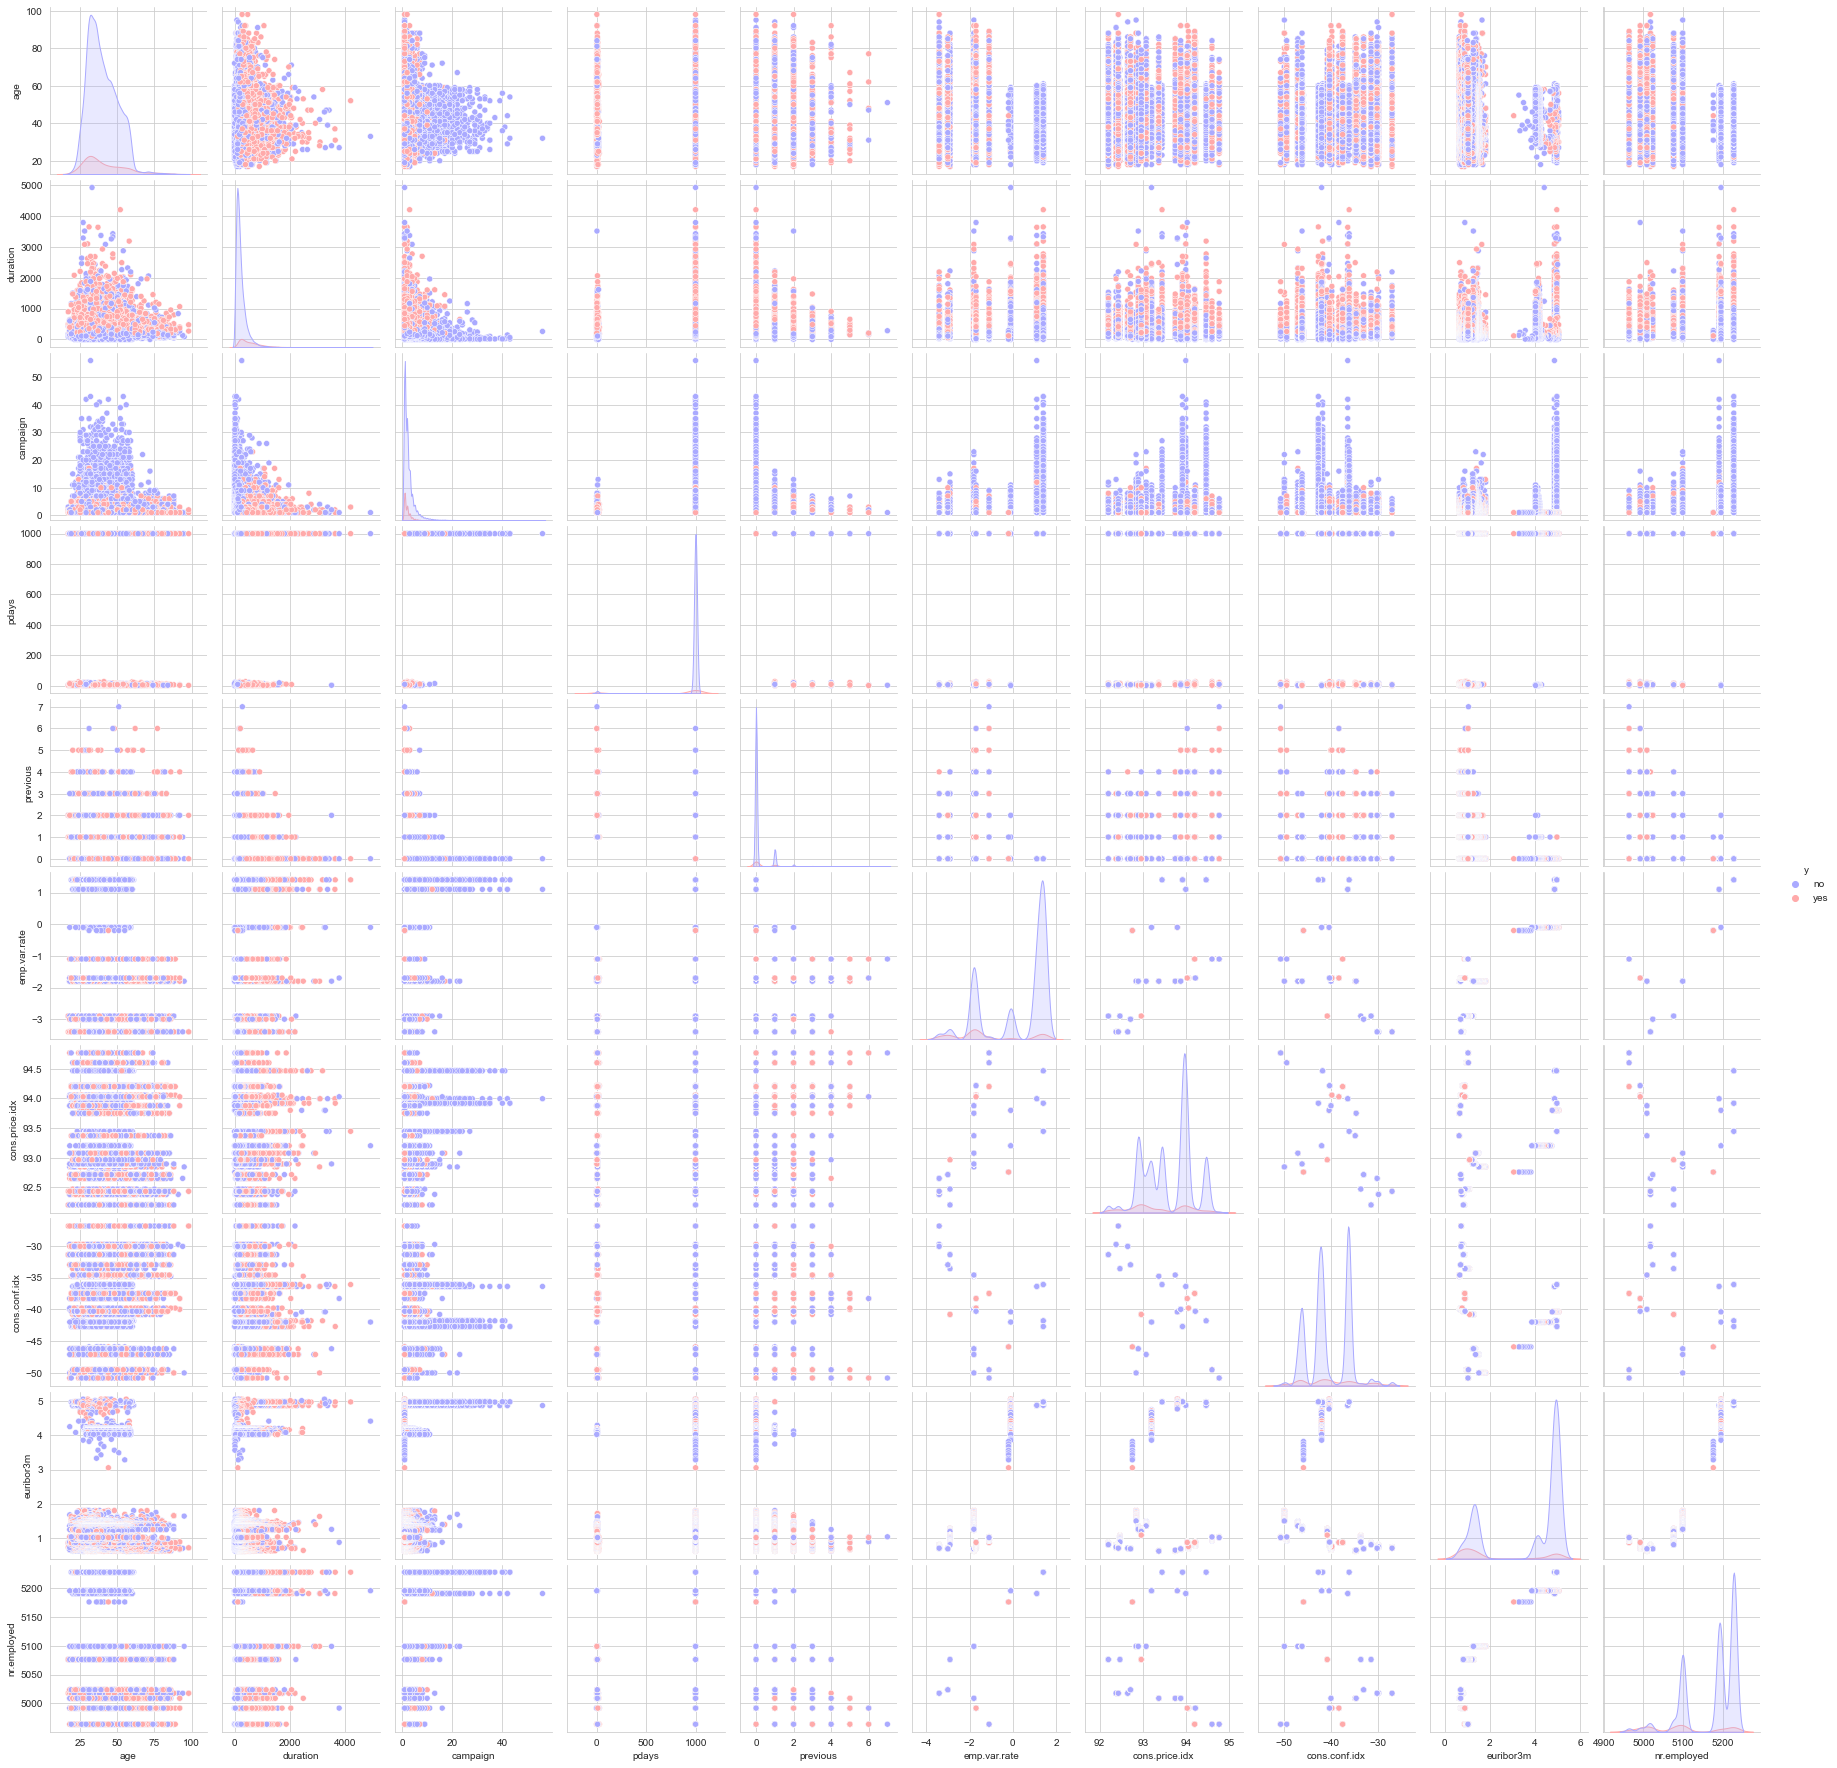

In [29]:
#sns.pairplot(data_df,hue='y',palette='bwr')

# Data Cleaning Process

**Handling Missing values**

In [27]:
data_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Inference
* Null values in the data affects the accuracy of the analysis hence it has to be handled before proceding to the analysis. 
* Since there are no null values among the provided data. We are free to move forward with the other process for analysis.

# Handling outliers

In [28]:
data_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

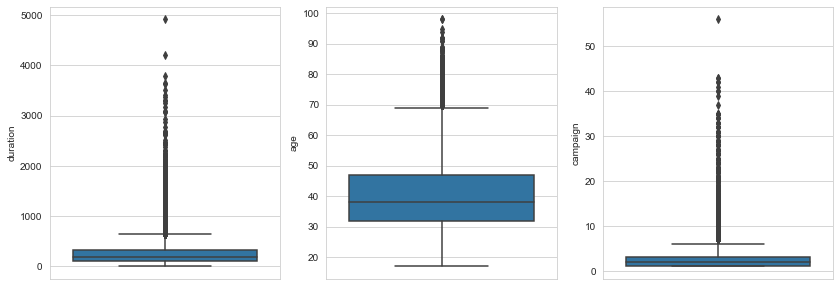

In [33]:
# Creating BOX plot to find the outliers
colmn = ['duration', 'age', 'campaign']
plt.figure(figsize=(19,5))

i=1
for cols in colmn:
    plt.subplot(1,4,i)
    sns.boxplot(y=cols, data=data_df)
    i=i+1
   


# Inference
* Outliers are abnormal values in a data which aaffects the predictions
* Duration, age and campawhich is something based on the event which happens normally which can not affect the data accuracy so it can be neglected.

# Correlation of data

In [34]:
data_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

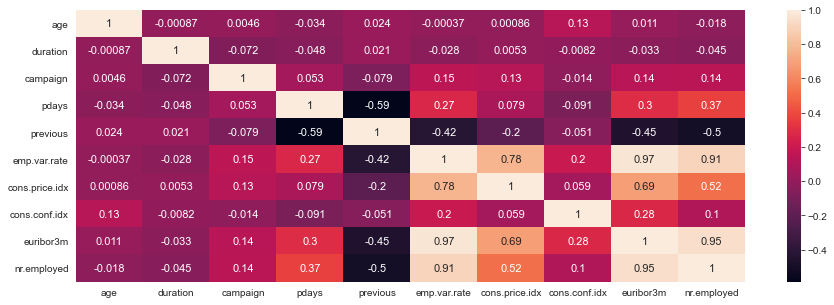

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(data_df.corr(), annot=True, annot_kws={'size':11})
#sns.heatmap(data_df.corr(), annot=True)

# Inference

From the above heatmap we can see that the column 'emp.var.rate' and 'nr.employed' are in correlation with 'euribor3m'. This gives us the reason to drop one column, Which would help us by reducing processing time. Hence we are removing 'euribor3m'.
Also column 'emp.var.rate' correlation value from heatmap is more compared to 'cons.price.idx' which is alo in coreelation with 'nr.employed' and 'euribor3m'. Hence we are dropping 'emp.var.rate'.

In [29]:
data_df.drop(['euribor3m','emp.var.rate'], axis=1,inplace=True)

In [30]:
data_df.corr()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,0.000857,0.129372,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,0.005312,-0.008173,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.127836,-0.013733,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.078889,-0.091342,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.203130,-0.050936,-0.501333
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,1.000000,0.058986,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.058986,1.000000,0.100513
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.522034,0.100513,1.000000


**Creating dummies and Handling 'unknown'values in the data**

In [31]:
for cols in data_df:
    print(data_df[cols].value_counts())
    print('___________________________________________________')

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
___________________________________________________
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
___________________________________________________
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
___________________________________________________
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
_________________________

In [32]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  nr.employed     41188 non-null 

In [33]:
#Converting to categorical variable
col_type=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

for col in col_type:
    data_df[col]=data_df[col].astype('category')
    
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  nr.employed 

In [210]:

#data_df.housing.replace({'yes':1,'no':0,},inplace=True)
#data_df.default.replace({'yes':1,'no':0},inplace=True)
#data_df.loan.replace({'yes':1,'no':0},inplace=True)
#data_df.contact.replace({'cellular':1,'telephone':0},inplace=True)
#data_df.y.replace({'yes':1,'no':0},inplace=True)

In [34]:
# Concerving 'unknown' values as 'NaN' value, So that we can drop using dropna command

#columns=['job','marital','education','default','housing','loan']
#for col in columns:
#    data_df.loc[data_df['col'].replace({'unknown':np.nan})]


data_df.job.replace({'unknown':np.nan},inplace=True)
data_df.marital.replace({'unknown':np.nan},inplace=True)
data_df.education.replace({'unknown':np.nan},inplace=True)
data_df.default.replace({'unknown':np.nan},inplace=True)
data_df.housing.replace({'unknown':np.nan},inplace=True)
data_df.loan.replace({'unknown':np.nan},inplace=True)

In [35]:
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,5191.0,no


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [67]:
#One Hot Encoding
#trf = ColumnTransformer([
#        ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'),[1,6])
#    ], remainder='passthrough')


#trf.fit_transform(data_df)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [37]:
data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'y'],
      dtype='object')

In [38]:
data_df.dropna(subset=['job','marital','education','default','housing','loan'], how='all',inplace=True)

In [39]:
data_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
cons.price.idx       0
cons.conf.idx        0
nr.employed          0
y                    0
dtype: int64

In [40]:
#Creatings dummy columns

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column],axis=1)
    return data

#axis =1 for Column, axis =0 Row

col_type=['job','marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']

for col in col_type:
    data_df = one_hot_encoding(data_df,col)
    
data_df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [41]:
data_df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

* From the data value 'unknown' is of no use in the analysis process.Dropping 'unknown' values from data help is increasing the accuracy. 
* Created dummy columns from categorical columns for analysis purpose.

In [42]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   nr.employed                    41188 non-null  float64
 8   job_blue-collar                41188 non-null  uint8  
 9   job_entrepreneur               41188 non-null  uint8  
 10  job_housemaid                  41188 non-null  uint8  
 11  job_management                 41188 non-null  uint8  
 12  job_retired                    41188 non-null 

# Inference
* We have change the values to categorical values before creating dummies and use pandas to create dumies for the categorical columns.
* Which also created a dummy column for unknown values in the data, Then we have removed the unkmnown columns for each values.
* We tried to remove 'unknown' value using the command handling_unknown in OneHotEncoder, but it only accepts int or str variables

# Splitting Data for Modeling

In [43]:
x= data_df.drop('y_yes',axis=1)
y=data_df['y_yes']


In [44]:
data_df.shape

(41188, 46)

# Modeling of data

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [46]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((27595, 45), (13593, 45), (27595,), (13593,))

In [47]:
#from sklearn.preprocessing import MinMaxScaler
#num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous','cons.price.idx', 'cons.conf.idx', 'nr.employed']

#scaler = MinMaxScaler()

#X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
#X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train

array([[ 2.87346699e-01, -8.85094512e-01,  5.11829034e-01, ...,
         2.00363109e+00,  3.95894000e-01, -1.83825000e-01],
       [-4.78162163e-01,  3.58805244e+00, -5.70989360e-01, ...,
         2.00363109e+00,  3.95894000e-01, -1.83825000e-01],
       [-5.73850770e-01, -1.07490653e-01,  1.50889569e-01, ...,
        -4.99093874e-01,  3.95894000e-01, -1.83825000e-01],
       ...,
       [-4.78162163e-01, -2.46073519e-01, -5.70989360e-01, ...,
        -4.99093874e-01, -2.52592866e+00,  5.43995647e+00],
       [ 2.80876145e-04,  1.42728411e-01, -2.10049895e-01, ...,
         2.00363109e+00,  3.95894000e-01, -1.83825000e-01],
       [-1.05229381e+00,  2.89010325e-01, -2.10049895e-01, ...,
        -4.99093874e-01,  3.95894000e-01, -1.83825000e-01]])

In [49]:
X_test

array([[ 1.62698721e+00,  4.35292239e-01, -5.70989360e-01, ...,
        -4.99093874e-01, -2.52592866e+00, -1.83825000e-01],
       [ 1.43560999e+00,  1.04233170e-01, -2.10049895e-01, ...,
        -4.99093874e-01,  3.95894000e-01, -1.83825000e-01],
       [-6.69539378e-01, -7.92705935e-01, -5.70989360e-01, ...,
        -4.99093874e-01, -2.52592866e+00, -1.83825000e-01],
       ...,
       [ 9.57166953e-01, -6.15627828e-01, -2.10049895e-01, ...,
        -4.99093874e-01,  3.95894000e-01, -1.83825000e-01],
       [ 1.33992138e+00, -4.69345914e-01,  8.72768498e-01, ...,
        -4.99093874e-01,  3.95894000e-01, -1.83825000e-01],
       [ 2.80876145e-04,  8.88350739e-02,  1.50889569e-01, ...,
         2.00363109e+00,  3.95894000e-01, -1.83825000e-01]])

# Using Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

**Prediction and Evaluation**

In [52]:
Y_test_predic_loreg=logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(Y_test,Y_test_predic_loreg))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12056
           1       0.66      0.41      0.50      1537

    accuracy                           0.91     13593
   macro avg       0.80      0.69      0.73     13593
weighted avg       0.90      0.91      0.90     13593



In [55]:
logmodel.score(X_test,Y_test)

0.9096593835062164

In [56]:
logmodel.score(X_train,Y_train)

0.9111070846167784

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_test_predic_loreg)
cm

array([[11740,   316],
       [  912,   625]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_test_predic_loreg)

0.9096593835062164

# Inference

* The Logistic Regression is generating a good result 0.91 for train and 0.90 for test data.
* Using Confusion matrixwe are able to find that 11740 will get 0's(no subscription) and 625 as 1's (subscription). Which also gives a accuracy score of 0.90, Thats a good score for the analysis.

# Using RandomForest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
Y_pred=classifier.predict((X_test))
Y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

# Creating Confusion matrix and Accuracy score

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[11657   399]
 [  933   604]]


0.9020083866696094

# Inference

The method RandomForest Classifier is not giving much difference from Logistic regression model this data. Since the accuracy rate is 0.902 which is less compared to logisticRegression model, We can consider the score of logistic regression for prediction.

# Conclusion



* We are able to predict the number of client who will subscribe and who will not subscribe throught the provided data.
* Various factors plays a vital role in the term deposite subscription. Thier age and job place a major role, for different job their salary would vary based on that client mind set towards term deposite subscription varies.
* We can see that few step can increase the number subscription towards term deposite.

**Suggestion**

* Flexible pricing of term deposite could increse the number of subscription. Since the lower salaried people can also afoord.
* Providing offers to people of age above 50 can increase the subscription and also providing gift and vouchers to the client would help increase the subscription.
* Providing fancy gift for clients who suggests to others and bring cilents to add in term deposite.
* At the period of Quartly or the month 'may' where all get salary increment new offers and scheme would help in the improvement of the subscription.
* Contacting and specifing the offers and scheme to more clients who have not previously contacted and already contacted can make more people aware of the plan and scheme of term deposit which help to improve subscription.
* Using Cellular contact have a high reach among clients, it can also reach a large number of clients and spread information about scheme over a large group.